In [1]:
import cv2
import matplotlib.pyplot as plt
import pytesseract

img shapes : (4384, 4096)


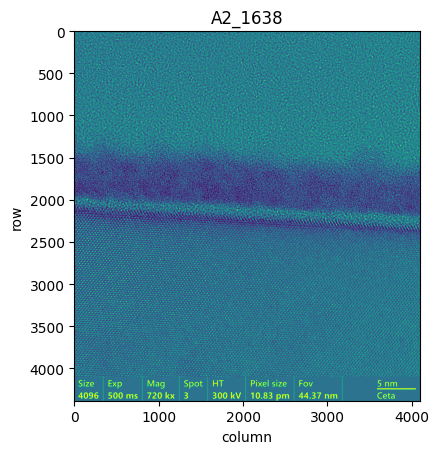

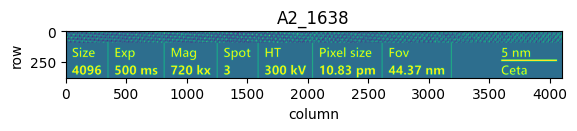

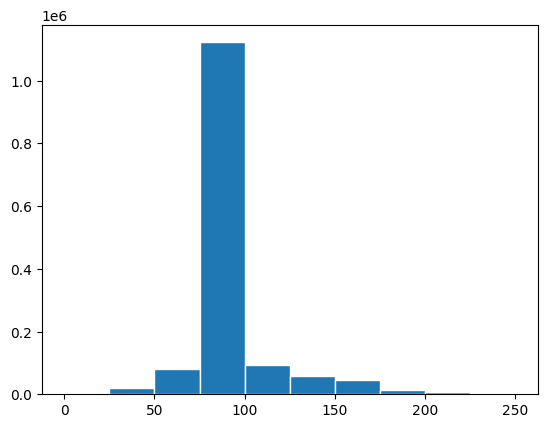

In [2]:
img = cv2.imread('TEM_image/A2/A-#2_ Camera 1638 720 kx Ceta Ceta.png', cv2.IMREAD_GRAYSCALE)
print('img shapes :', img.shape)

plt.imshow(img)
plt.xlabel('column')
plt.ylabel('row')
plt.title('A2_1638')
plt.show()

plt.imshow(img[4000:,:])
plt.xlabel('column')
plt.ylabel('row')
plt.title('A2_1638')
plt.show()

import numpy as np
plt.hist(np.array(img[4000:,:]).flatten(), edgecolor='white', bins=np.arange(0,255,25))
plt.show()

In [3]:
scale_bar = img[4000:,3500:]
_, binary = cv2.threshold(scale_bar, 200, 255, cv2.THRESH_BINARY_INV)

In [4]:
# read the number above the bar with tesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

custom_config = r'--oem 1 --psm 11 outputbase'
text = pytesseract.image_to_string(binary, config=custom_config)
text

'se,\n\n, ee\n\n5 nm\n\nCeta\n'

In [5]:
import re
result = re.search(r"([0-9]+) nm", text)
result.group(0)

'5 nm'

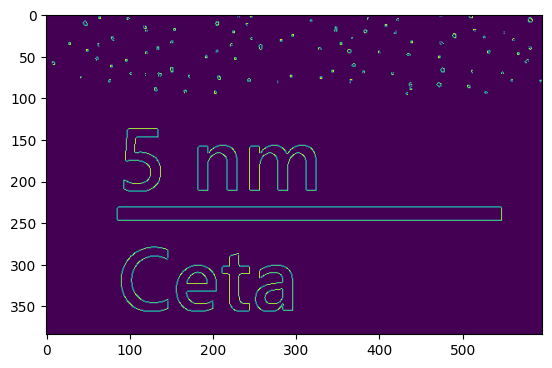

In [6]:
edges = cv2.Canny(binary, 0,100)
plt.imshow(edges)
plt.show()
#print(lines)
#bar_length = abs(lines[0]-lines[2])
#bar_length

In [7]:
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, 100, 10)[0][0]
lines

array([ 87, 231, 546, 231], dtype=int32)

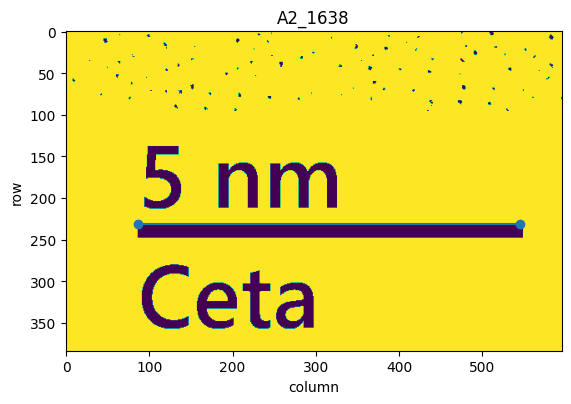

In [8]:
plt.imshow(binary)
plt.xlabel('column')
plt.ylabel('row')
plt.title('A2_1638')

# plt.hist(np.array(binary).flatten(), edgecolor='white', bins=np.arange(0,255,25))
plt.plot([lines[0], lines[2]], [lines[1], lines[3]], 'o-')
plt.show()

In [9]:
bar_length = abs(lines[0]-lines[2])
bar_length

459

In [10]:
def PxToLen(x): # [nm]
    return x*5/bar_length

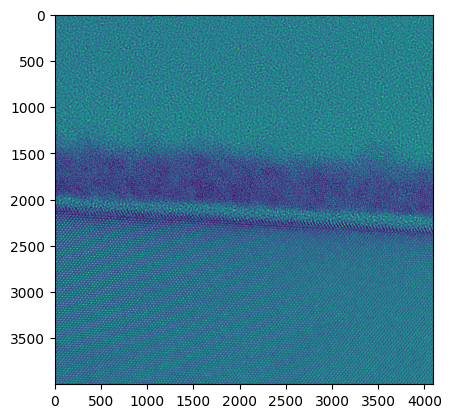

In [11]:
# Detect the thin film
film = img[:4000,:]
plt.imshow(film)
plt.show()

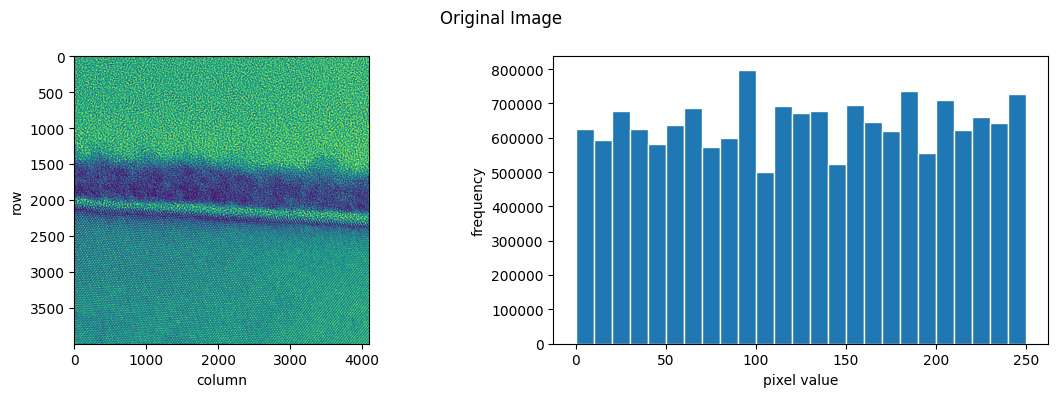

In [12]:
# histogram equalization; minmaxscaling * 255
film_equalized = cv2.equalizeHist(film)
fig, axs = plt.subplots(1,2,figsize=(12,4))
fig.tight_layout(pad=3)
axs[0].imshow(film_equalized)
axs[0].set_xlabel('column')
axs[0].set_ylabel('row')

# fig.suptitle('2X2 cross', y=1)
axs[1].set_xlabel('pixel value')
axs[1].set_ylabel('frequency')

fig.suptitle('Original Image', y=1)
plt.show()

fig.savefig('original.png', bbox_inches='tight')

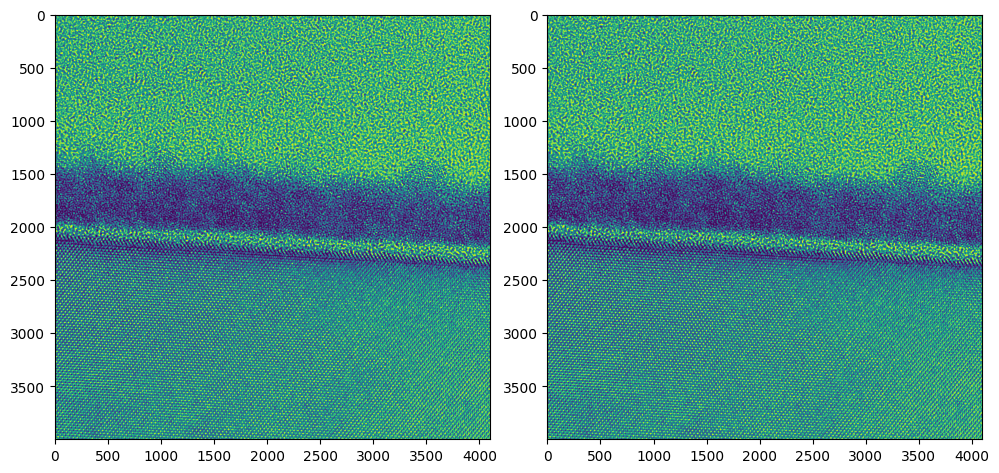

In [22]:
# Noise is expected to be gaussian
denoised_film = cv2.fastNlMeansDenoising(film_equalized, None, 10)
fig, axs = plt.subplots(1,2, figsize=(10,5))
fig.tight_layout()
axs[0].imshow(film_equalized)
axs[1].imshow(denoised_film)
plt.show()

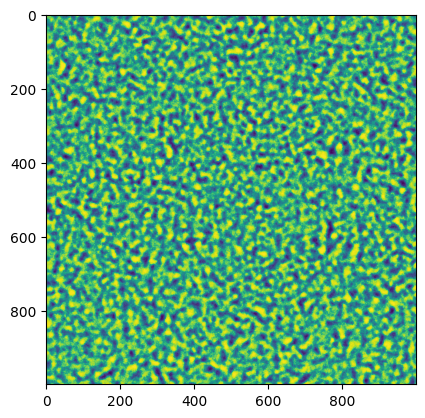

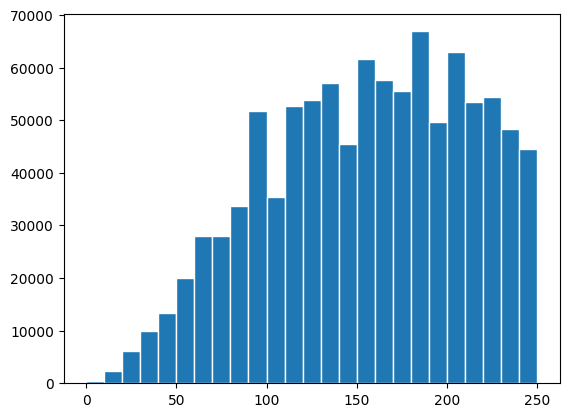

In [27]:
plt.imshow(film_equalized[:1000,:1000])
plt.show()

plt.hist(film_equalized[:1000,:1000].flatten(), edgecolor='w', bins=np.arange(0,260,10))
plt.show()

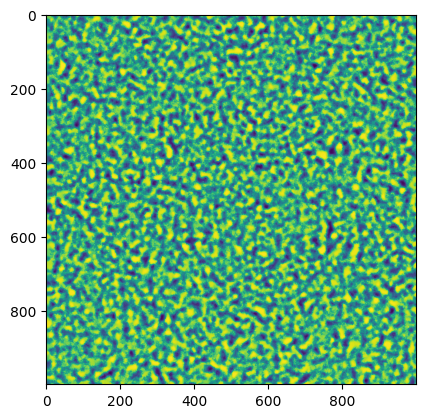

In [28]:
denoised = cv2.fastNlMeansDenoising(film_equalized[:1000,:1000], None, 10)
plt.imshow(denoised)
plt.show()

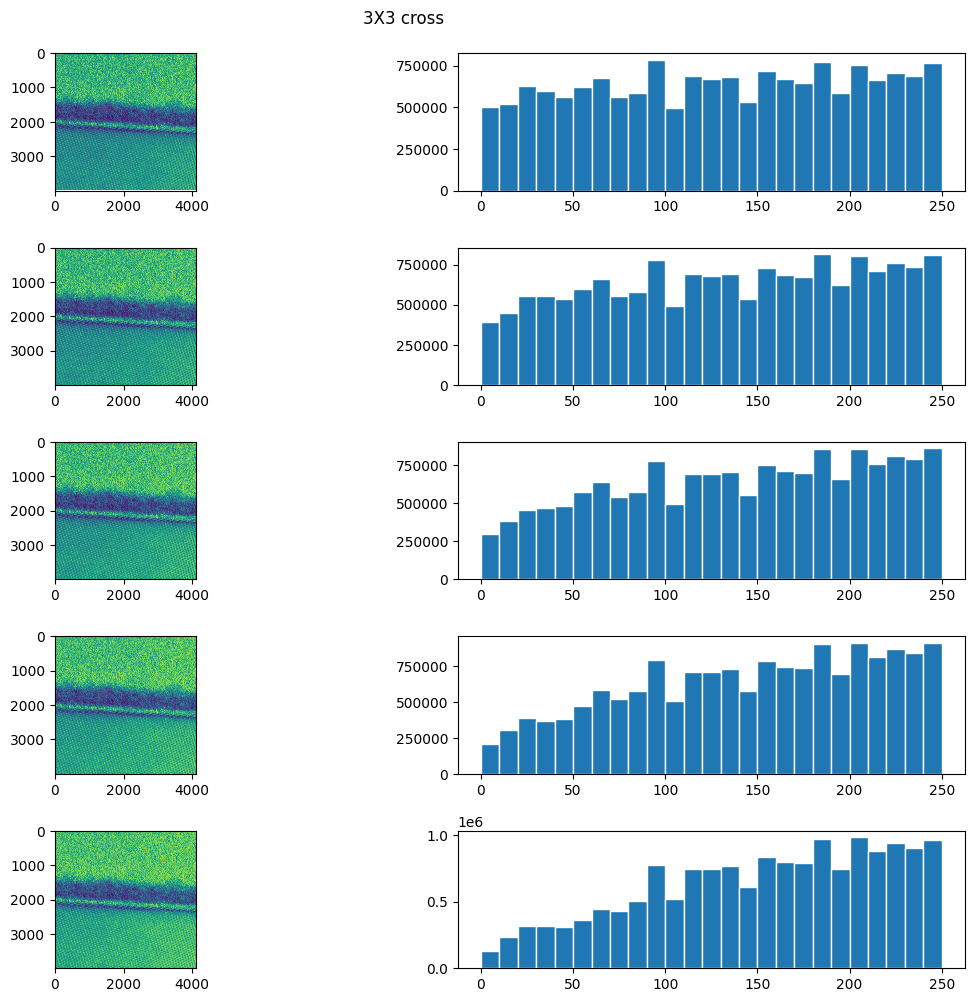

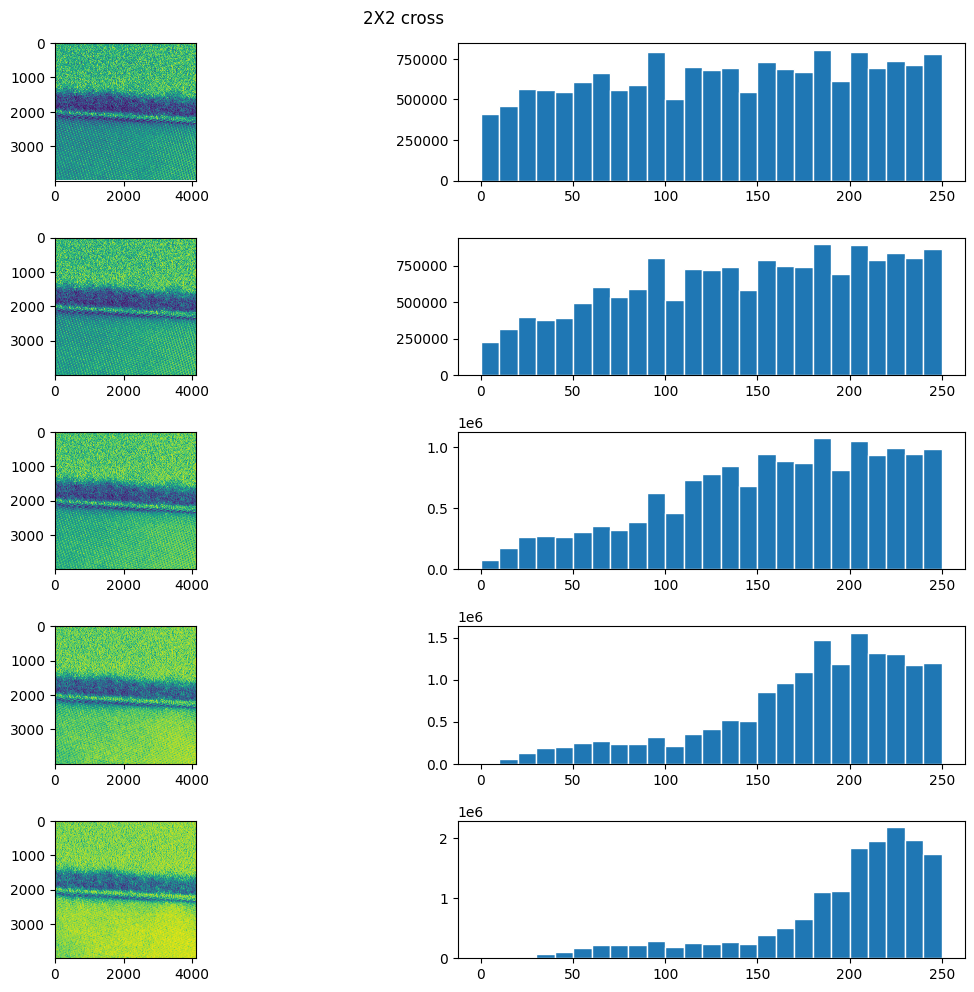

In [20]:
# noise must be further reduced!
# film_transformed = c`v2.morphologyEx(film_eaqualized, op=cv2.MORPH_CLOSE, kernel=cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5)), iterations=1)
# plt.imshow(film_transformed)
# plt.show()

fig, axs = plt.subplots(5,2, figsize=(12,10))
fig.tight_layout(pad=2)
for i in range(5):
    film_transformed = cv2.morphologyEx(film_equalized, op=cv2.MORPH_CLOSE, kernel=cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3)), iterations=i+1)
    axs[i,0].imshow(film_transformed)
    axs[i,1].hist(np.array(film_transformed).flatten(), edgecolor='white', bins=np.arange(0,260,10))
# fig.suptitle('3X3 cross',y=1.01)
plt.show()
# fig.savefig('images/cross3.png', bbox_inches = 'tight')

fig, axs = plt.subplots(5,2, figsize=(12,10))
fig.tight_layout(pad=2)
for i in range(5):
    film_transformed = cv2.morphologyEx(film_equalized, op=cv2.MORPH_CLOSE, kernel=cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5)), iterations=i+1)
    axs[i,0].imshow(film_transformed)
    axs[i,1].hist(np.array(film_transformed).flatten(), edgecolor='white', bins=np.arange(0,260,10))
# fig.suptitle('2X2 cross', y=1)
# fig.savefig('images/cross2.png', bbox_inches = 'tight')
plt.show()   

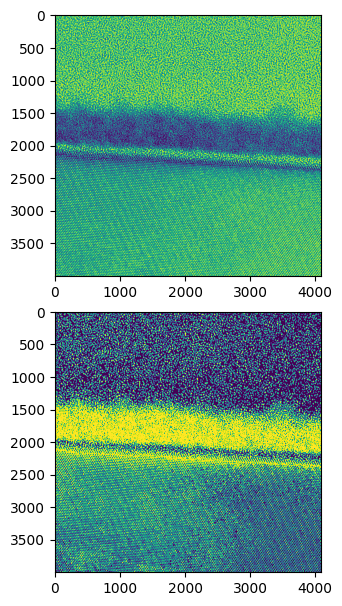

In [65]:
film_transformed = cv2.morphologyEx(film_equalized, op=cv2.MORPH_CLOSE, kernel=cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3)), iterations=5)
_, binary = cv2.threshold(film_transformed, 150, 255, cv2.THRESH_BINARY_INV)
fig, axs = plt.subplots(2, figsize=(6,6))
fig.tight_layout(pad=0.5)
axs[0].imshow(film_transformed)
axs[1].imshow(binary)
# fig.suptitle('Binary threshold to the morp. transformed; iter:2')
plt.show()
# fig.savefig('images/binary_iter2.png', bbox_inches='tight')

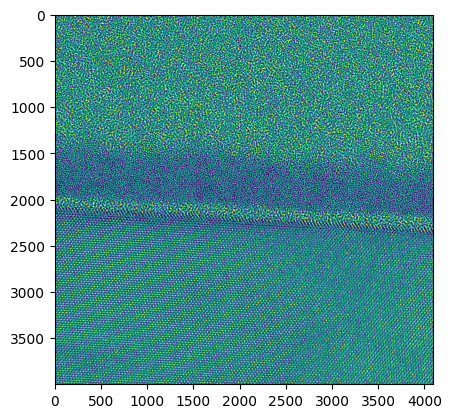

In [73]:
th2 = cv2.adaptiveThreshold(film_transformed,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,15,0)
plt.imshow(th2)

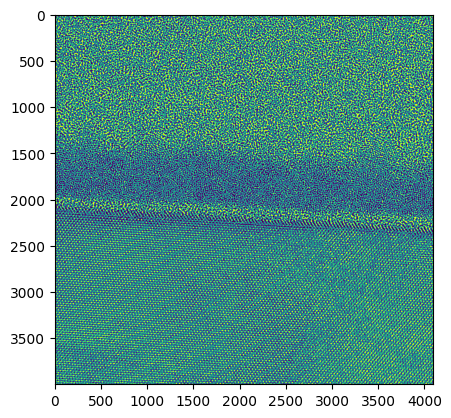

In [74]:
th2 = cv2.adaptiveThreshold(film_transformed,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,15,0)
plt.imshow(th2)